In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [144]:
X = iris.data
y = iris.target

In [145]:
X = X[y<2,:2]
y = y[y<2]

In [146]:
X.shape

(100, 2)

In [147]:
y.shape

(100,)

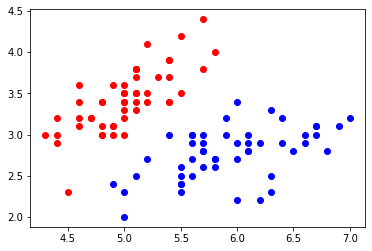

In [148]:
plt.scatter(X[y==0,0],X[y==0,1],color = 'red')
plt.scatter(X[y==1,0],X[y==1,1],color = 'blue')

### 使用逻辑回归

In [149]:
from PlayML.Model_selection import train_test_split

In [150]:
X_train,X_test,y_train,y_test = train_test_split(X,y,seed=666)

In [151]:
%run C:\Users\bufanx\PycharmProjects\MachineLearning\PlayML\LogisticRegression.py

In [152]:
log_reg = LogisticRegression()

In [153]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [154]:
log_reg.score(X_test,y_test)

1.0

In [155]:
X_test.shape[0]

20

In [156]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [157]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [158]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [159]:
def x2(x1):
    return (-log_reg.coef_[0]*x1-log_reg.interception_)/log_reg.coef_[1]

In [160]:
x1_plot=np.linspace(4,8,1000)
x2_plot=x2(x1_plot)

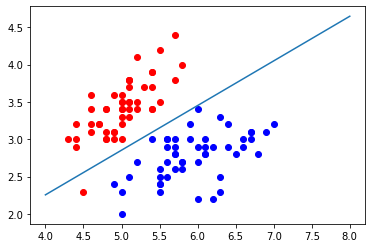

In [161]:
plt.scatter(X[y==0,0],X[y==0,1],color = 'red')
plt.scatter(X[y==1,0],X[y==1,1],color = 'blue')
plt.plot(x1_plot,x2_plot)

In [162]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

<ipython-input-162-5c8be435754f>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


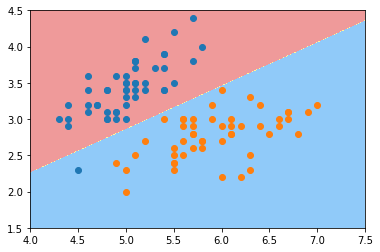

In [163]:
plot_decision_boundary(log_reg,axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])